# Limpieza de datos del DataFrame de RIAA

Extraido de: https://www.riaa.com/gold-platinum/?tab_active=awards_by_artist#search_section

In [11]:
import pandas as pd

riaa_best = pd.read_csv("..\data\RIAA_alltime_best.csv", index_col=0)
riaa_best

,artist_name,certifications,gold_albums,platinum_albums,multiplatinum_albums,diamond_albums
0,THE BEATLES,183.0,48,42,26,6
1,GARTH BROOKS,157.0,31,31,17,9
2,ELVIS PRESLEY,139.0,101,57,25,1
3,EAGLES,120.0,13,13,11,3
4,LED ZEPPELIN,112.5,19,18,14,5
...,...,...,...,...,...,...
145,"CROSBY, STILLS, NASH & YOUNG",18.0,4,4,3,0
146,DESTINY'S CHILD,18.0,6,6,3,0
147,P!NK,18.0,8,8,5,0
148,RANDY TRAVIS,18.0,12,8,4,0


In [2]:
# Esta tabla esta ordenada de mayor certificación de ventas a menor sobre estos discos, pero lo que mas nos interesa es la cantidad de galardones.
# Añadiremos una columna con la suma total de discos de oro, platino, multiplatino y diamante de cada uno para poder clasificarlos.

riaa_best['total_awards'] = riaa_best['gold_albums'] + riaa_best['platinum_albums'] + riaa_best['multiplatinum_albums'] + riaa_best['diamond_albums']
riaa_best

,artist_name,certifications,gold_albums,platinum_albums,multiplatinum_albums,diamond_albums,total_awards
0,THE BEATLES,183.0,48,42,26,6,122
1,GARTH BROOKS,157.0,31,31,17,9,88
2,ELVIS PRESLEY,139.0,101,57,25,1,184
3,EAGLES,120.0,13,13,11,3,40
4,LED ZEPPELIN,112.5,19,18,14,5,56
...,...,...,...,...,...,...,...
145,"CROSBY, STILLS, NASH & YOUNG",18.0,4,4,3,0,11
146,DESTINY'S CHILD,18.0,6,6,3,0,15
147,P!NK,18.0,8,8,5,0,21
148,RANDY TRAVIS,18.0,12,8,4,0,24


In [8]:
# Ordenamos a los artistas de mayor a menor numero de discos galardonados

riaa_best = riaa_best.sort_values('total_awards', ascending=False)
riaa_best

,artist_name,certifications,gold_albums,platinum_albums,multiplatinum_albums,diamond_albums,total_awards
0,ELVIS PRESLEY,139.0,101,57,25,1,184
1,THE BEATLES,183.0,48,42,26,6,122
2,BARBRA STREISAND,68.5,51,30,12,0,93
3,GARTH BROOKS,157.0,31,31,17,9,88
4,GEORGE STRAIT,69.0,39,33,13,0,85
...,...,...,...,...,...,...,...
145,MEAT LOAF,21.0,5,3,2,1,11
146,ADELE,28.0,3,3,3,2,11
147,"CROSBY, STILLS, NASH & YOUNG",18.0,4,4,3,0,11
148,ALANIS MORISSETTE,20.5,4,3,2,1,10


In [9]:
# Actualizamos los indices del dataframe, que se han descolocado.

riaa_best = riaa_best.reset_index(drop=True)
riaa_best

,artist_name,certifications,gold_albums,platinum_albums,multiplatinum_albums,diamond_albums,total_awards
0,ELVIS PRESLEY,139.0,101,57,25,1,184
1,THE BEATLES,183.0,48,42,26,6,122
2,BARBRA STREISAND,68.5,51,30,12,0,93
3,GARTH BROOKS,157.0,31,31,17,9,88
4,GEORGE STRAIT,69.0,39,33,13,0,85
...,...,...,...,...,...,...,...
145,MEAT LOAF,21.0,5,3,2,1,11
146,ADELE,28.0,3,3,3,2,11
147,"CROSBY, STILLS, NASH & YOUNG",18.0,4,4,3,0,11
148,ALANIS MORISSETTE,20.5,4,3,2,1,10


In [6]:
#riaa_best.to_csv('RIAA_alltime_best_limpio.csv')

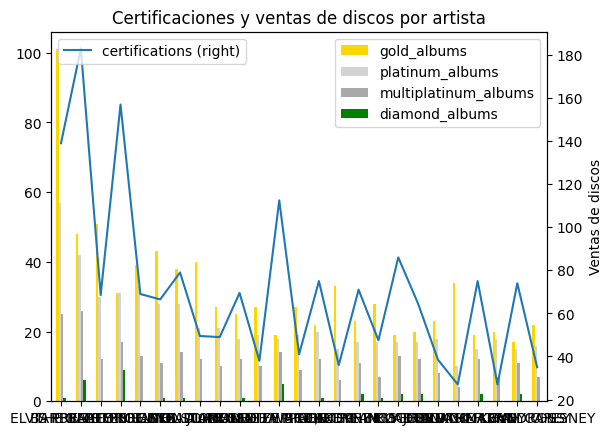

In [15]:
import matplotlib.pyplot as plt

#Cogeremos los 25 primeros
riaa_best25 = riaa_best.head(25)

# Creamos el gráfico de columnas agrupadas y línea
ax = riaa_best25[['gold_albums', 'platinum_albums', 'multiplatinum_albums', 'diamond_albums']].plot(kind='bar', 
                                                                                                    color=['gold', 'lightgrey', 'darkgrey', 'green'])
riaa_best25['certifications'].plot(kind='line', ax=ax, secondary_y=True)

# Configuramos el gráfico
plt.title('Certificaciones y ventas de discos por artista')
plt.xticks(range(len(riaa_best25)), riaa_best25['artist_name'])
plt.ylabel('Ventas de discos')
plt.xlabel('Artista')
plt.legend(loc='upper left')

# Mostramos el gráfico resultante
plt.show()